In [1]:
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
x_train= '/content/drive/MyDrive/AI/tien/x_train'
x_test= '/content/drive/MyDrive/AI/tien/x_test'

In [9]:
x_train = ImageDataGenerator(rescale=1/255)
x_test = ImageDataGenerator(rescale=1/255)


In [10]:
x_train_data = x_train.flow_from_directory(
    directory=r"/content/drive/MyDrive/AI/money/x_train",
    target_size=(224, 224),
    batch_size=3,
    class_mode='categorical',
    )
x_test_data = x_test.flow_from_directory(
    directory=r"/content/drive/MyDrive/AI/money/x_test",
    target_size=(224, 224),
    batch_size=3,
    class_mode= "categorical",
    )

Found 91 images belonging to 11 classes.
Found 236 images belonging to 11 classes.


In [11]:
x_train_data.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200': 3,
 '200k': 4,
 '20k': 5,
 '2k': 6,
 '500': 7,
 '500k': 8,
 '50k': 9,
 '5k': 10}

In [12]:
  model = Sequential()

  model.add(Conv2D(32,(3,3),input_shape=(224,224,3),padding='same',activation='relu'))
  model.add(Dropout(0.2))

  model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(Dropout(0.2))

  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(Dropout(0.2))

  model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dropout(0.2))

  model.add(Dense(1024,activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(11,activation='softmax'))
  model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 dropout (Dropout)           (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 112, 112, 64)      0         
                                                        

In [13]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train_data,epochs=30,batch_size=5,verbose=1,validation_data= x_test_data)

Epoch 1/30
31/31 [==============================] - 95s 3s/step - loss: 2.4823 - accuracy: 0.1978 - val_loss: 2.4580 - val_accuracy: 0.1271
Epoch 2/30
31/31 [==============================] - 2s 68ms/step - loss: 1.6396 - accuracy: 0.3077 - val_loss: 2.4627 - val_accuracy: 0.0720
Epoch 3/30
31/31 [==============================] - 2s 70ms/step - loss: 1.6900 - accuracy: 0.2527 - val_loss: 2.9560 - val_accuracy: 0.1271
Epoch 4/30
31/31 [==============================] - 2s 69ms/step - loss: 1.5912 - accuracy: 0.1978 - val_loss: 2.9401 - val_accuracy: 0.1271
Epoch 5/30
31/31 [==============================] - 2s 68ms/step - loss: 1.5697 - accuracy: 0.3187 - val_loss: 3.3125 - val_accuracy: 0.1271
Epoch 6/30
31/31 [==============================] - 2s 68ms/step - loss: 1.4780 - accuracy: 0.3516 - val_loss: 2.8811 - val_accuracy: 0.1144
Epoch 7/30
31/31 [==============================] - 2s 69ms/step - loss: 1.3038 - accuracy: 0.4505 - val_loss: 3.4671 - val_accuracy: 0.1780
Epoch 8/30
31/

In [14]:
model.save('nhandientien.h5')

In [15]:
from keras.models import load_model
recognition = load_model('nhandientien.h5')

(1, 224, 224, 3)

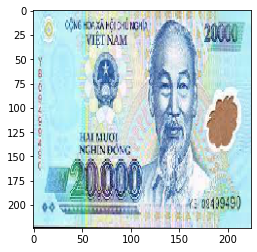

In [16]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('20k (1).jpg', target_size =(224,224))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
img = img.astype('float32')
img = img/255
img.shape

In [18]:
np.argmax(recognition.predict(img),axis= 1)

array([10])

x_train_data.class_indices {'100k': 0, '10k': 1, '1k': 2, '200': 3, '200k': 4, '20k': 5, '2k': 6, '500': 7, '500k': 8, '50k': 9, '5k': 10}

